# Instagram mini analysis for dashum software

In [1]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import re
import jdatetime
import pandas as pd

### create default database

In [2]:
db = sqlite3.connect(':memory:')
cursor = db.cursor()

### create table

In [3]:
cursor.execute("CREATE TABLE InstagramInfo(id INTEGER PRIMARY KEY, username TEXT, followers TEXT, following TEXT, date_time TEXT)")
db.commit()

### insert default data

In [4]:
username1 = 'a_vakily7'
followers1 = '100'
following1 = '150'
date_time1 = '1398/01/01'

username2 = 'a_vakily7'
followers2 = '150'
following2 = '200'
date_time2 = '1398/06/01'

username3 = 'a_vakily7'
followers3 = '110'
following3 = '100'
date_time3 = '1398/11/12'


default_data = [
    (username1,followers1, following1, date_time1),
    (username2,followers2, following2, date_time2),
    (username3,followers3, following3, date_time3)
]

In [5]:
cursor.executemany('''INSERT INTO InstagramInfo(username, followers, following, date_time) 
                        VALUES(?,?,?,?)''',
                   default_data)
db.commit()

### display table

In [6]:
query = '''
    select * from InstagramInfo
'''
my_dataset = pd.read_sql_query(sql=query, con=db)
my_dataset

,id,username,followers,following,date_time
0,1,a_vakily7,100,150,1398/01/01
1,2,a_vakily7,150,200,1398/06/01
2,3,a_vakily7,110,100,1398/11/12


### what datetime is it?

In [7]:
today_obj = jdatetime.datetime.now()
today = "{0}/{1}/{2}_{3}:{4}:{5}".format(today_obj.year,
                               today_obj.month,
                               today_obj.day,
                               today_obj.hour,
                               today_obj.minute,
                               today_obj.second
                              )
print(today)

1399/2/11_19:1:51


### my request 

In [8]:
username = "a_vakily7"

In [9]:
page = requests.get(url="https://www.instagram.com/{}/".format(username))
data = BeautifulSoup(page.content)

In [10]:
pattern = re.compile(r'''
"edge_followed_by":{"count": 
(\d*)
}
\D*
"edge_follow":{"count":
(\d*)
}
\D*
"full_name":"
(\D*)
",
''', re.VERBOSE)

instagram_data = pattern.search(data.text).groups()

new_record = {
    'username' : instagram_data[2],
    'followers' : instagram_data[0],
    'following' : instagram_data[1],
    'date_time' : today,
}

print(new_record)

{'username': 'abolfazl_vakily', 'followers': '301', 'following': '662', 'date_time': '1399/2/11_19:1:51'}


### insert a new instagram record on my database

In [11]:
cursor.execute('''INSERT INTO InstagramInfo(username, followers, following, date_time)
                    VALUES(?,?,?,?)''',
               (new_record['username'], new_record['followers'], new_record['following'], new_record['date_time']))
db.commit()

### display table

In [12]:
query = '''
    select * from InstagramInfo
'''

my_dataset = pd.read_sql_query(sql=query, con=db)

In [13]:
my_dataset = my_dataset.set_index('id')
my_dataset

,username,followers,following,date_time
id,,,,
1,a_vakily7,100,150,1398/01/01
2,a_vakily7,150,200,1398/06/01
3,a_vakily7,110,100,1398/11/12
4,abolfazl_vakily,301,662,1399/2/11_19:1:51


<IPython.core.display.Javascript object>


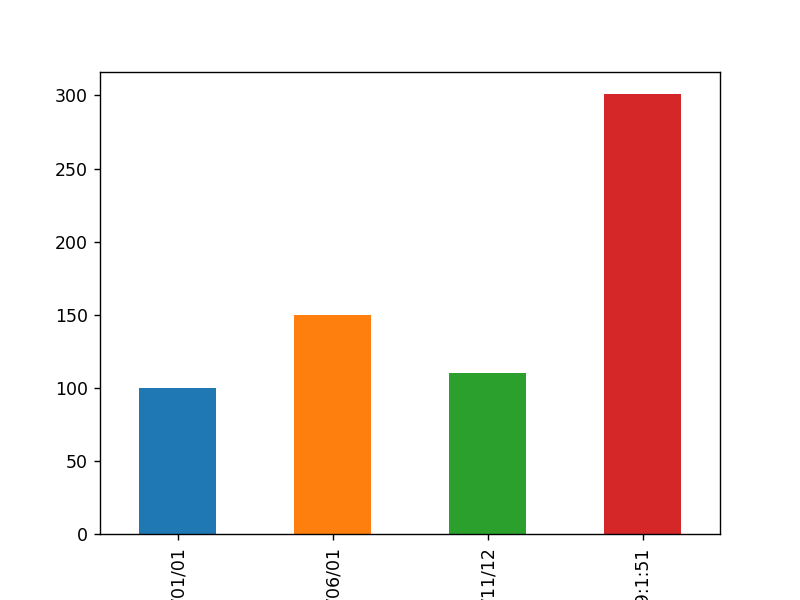

In [14]:
%matplotlib notebook
my_dataset.followers = my_dataset.followers.astype(dtype='int64')
my_dataset = my_dataset.set_index('date_time')
my_dataset.followers.plot.bar();

In [129]:
cursor.execute('''DROP TABLE InstagramInfo''')
db.commit()
db.close()